In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv('student_info.csv')
df.head()

,study_hours,student_marks
0,6.83,78.50
1,6.56,76.74
2,NaN,78.68
3,5.67,71.82
4,8.67,84.19


In [2]:
df['study_hours'].isnull().sum()
df.shape

(200, 2)

In [3]:
df['student_marks'].isnull().sum()

0

In [4]:
df = df.dropna(axis = 0)
df['study_hours'].isnull().sum()
df.shape

(195, 2)

In [5]:
df.describe()

,study_hours,student_marks
count,195.000000,195.000000
mean,6.995949,77.961231
std,1.253060,4.982542
min,5.010000,68.570000
25%,5.775000,73.295000
50%,7.120000,77.780000
75%,8.085000,82.440000
max,8.990000,86.990000


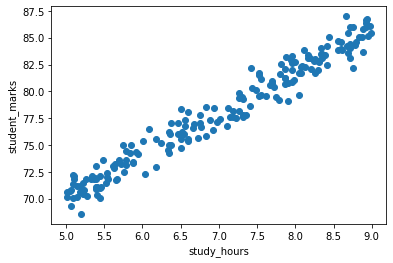

In [6]:
plt.scatter(x=df.study_hours, y=df.student_marks)
plt.xlabel('study_hours')
plt.ylabel('student_marks')
plt.show()

In [7]:
# For Standardization

# from sklearn import preprocessing

# x = df.values #returns a numpy array
# min_max_scaler = preprocessing.MinMaxScaler()
# x_scaled = min_max_scaler.fit_transform(x)
# df = pd.DataFrame(x_scaled)

df.head()

,study_hours,student_marks
0,6.83,78.50
1,6.56,76.74
3,5.67,71.82
4,8.67,84.19
5,7.55,81.18


In [8]:
X = df.iloc[:,[0]].values
Y = df.iloc[:,[1]].values

from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=45)


from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(X_train, Y_train)
print(lr.predict([[4]])) # agar 4 hours padhe to 66.19% aaega
Y_pred = lr.predict(X_test)
# Y_pred
lr.score(X_test, Y_test)

[[66.1956194]]


0.957288870395149

In [9]:
# straight Line formula ---> y = mx + c, we have x value(no. of Hours) we have to find out m and c value, which we find 
# with the help of lr.fit()

print(lr.coef_)  # m value
print(lr.intercept_) # c value

[[3.91835511]]
[50.52219895]


In [10]:
m = 3.91
c = 50.52
y = m*10.3+c
y

90.793

In [11]:
# Check that our predicted value how much closer to our original value

pd.DataFrame(np.c_[X_test, Y_test, Y_pred], columns = ['study_hours','student_original_marks','student_predicted_marks'])

,study_hours,student_original_marks,student_predicted_marks
0,5.01,70.11,70.153158
1,6.46,77.07,75.834773
2,5.46,71.10,71.916418
3,5.49,73.61,72.033969
4,6.51,74.75,76.030691
5,8.19,83.08,82.613527
6,8.87,85.10,85.278009
7,7.94,82.93,81.633939
8,8.67,84.19,84.494338
9,7.01,77.46,77.989868


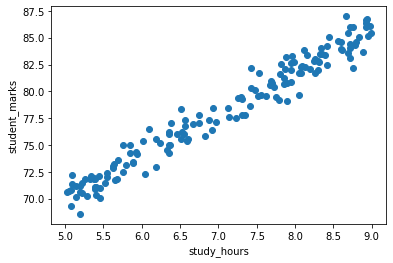

In [12]:
plt.scatter(X_train,Y_train)
plt.xlabel('study_hours')
plt.ylabel('student_marks')
plt.show()

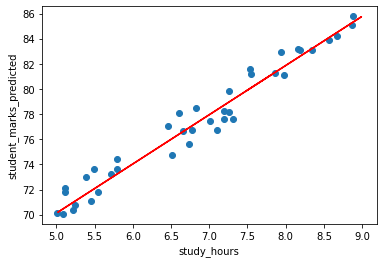

In [13]:
plt.scatter(X_test,Y_test)
plt.plot(X_train,lr.predict(X_train),color ='r')
plt.xlabel('study_hours')
plt.ylabel('student_marks_predicted')
plt.show()

In [14]:
import joblib
joblib.dump(lr,'std_mark_predictor.pkl')

['std_mark_predictor.pkl']

In [15]:
model = joblib.load('std_mark_predictor.pkl')
model.predict([[4]])

array([[66.1956194]])